# Importing all the necessary libraries.

In [1]:
import numpy
from numpy import arange

from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_squared_error

# Loading the Dataset.

In [2]:
filepath ='/home/nikhil/Downloads/boston_house_prices.csv'
dataset = read_csv(filepath,skiprows=1)

In [3]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Analyze Data.

In [4]:
dataset.shape

(506, 14)

In [5]:
dataset.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [6]:
dataset.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [7]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647422,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


# Data Visualizations.

## Unimodal Data Visualizations

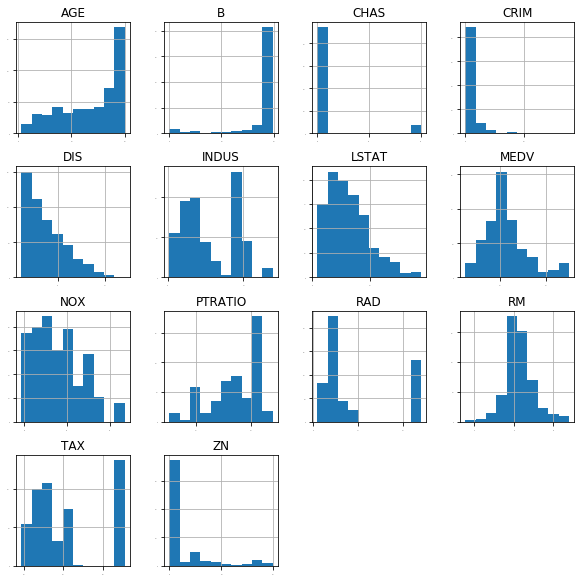

In [9]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(10,10))
pyplot.show()

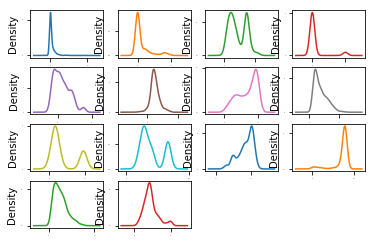

In [10]:
# density
dataset.plot(kind='density' , subplots=True, layout=(4,4), sharex=False, legend=False,fontsize=1)
pyplot.show()

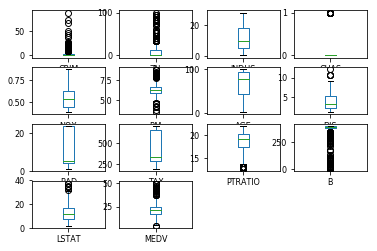

In [11]:
# box and whisker plots
dataset.plot(kind= ' box ' , subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=8)
pyplot.show()

# Multimodal Data Visualizations.

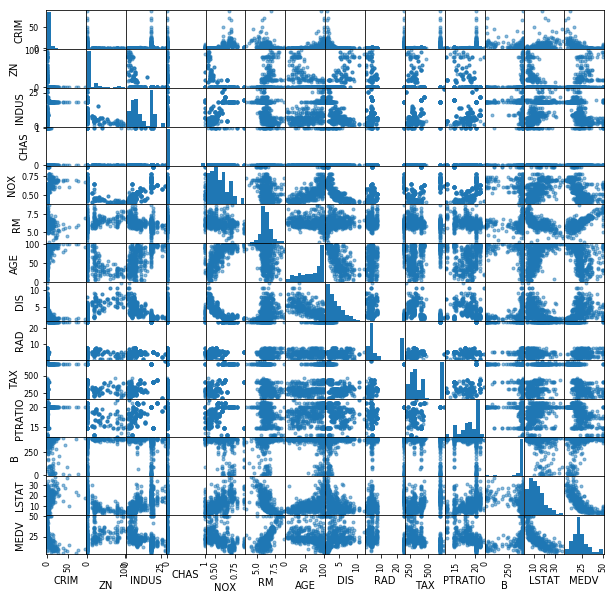

In [12]:
# scatter plot matrix
scatter_matrix(dataset,figsize=(10,10))
pyplot.show()

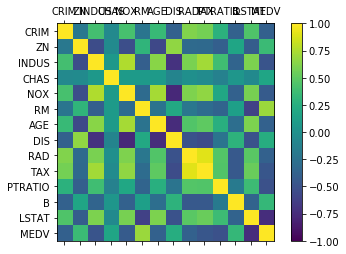

In [13]:
# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none' )
fig.colorbar(cax)
ticks = numpy.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(dataset.columns)
ax.set_yticklabels(dataset.columns)
pyplot.show()

# Validation Dataset.

In [14]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:13]
Y = array[:,13]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

# Evaluate Algorithms: Baseline

In [15]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [16]:
# Spot-Check Algorithms
models = []
models.append(( ' LR ' , LinearRegression()))
models.append(( ' LASSO ' , Lasso()))
models.append(( ' EN ' , ElasticNet()))
models.append(( ' KNN ' , KNeighborsRegressor()))
models.append(( ' CART ' , DecisionTreeRegressor()))
models.append(( ' SVR ' , SVR()))

In [17]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    #print cv_results
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

 LR : -21.400099 (9.390450)
 LASSO : -26.431547 (11.655308)
 EN : -27.504052 (12.309801)
 KNN : -41.896488 (13.901688)
 CART : -23.431938 (10.701502)
 SVR : -85.518342 (31.994798)


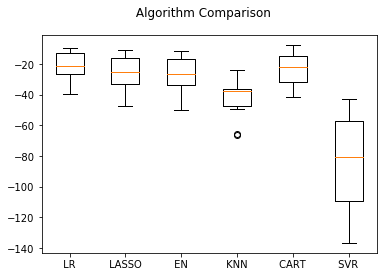

In [18]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle( ' Algorithm Comparison ' )
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Evaluate Algorithms: Standardization

In [19]:
# Standardize the dataset
pipelines = []
pipelines.append(( ' ScaledLR ' , Pipeline([( ' Scaler ' , StandardScaler()),( ' LR ' ,
LinearRegression())])))
pipelines.append(( ' ScaledLASSO ' , Pipeline([( ' Scaler ' , StandardScaler()),( ' LASSO ' ,
Lasso())])))
pipelines.append(( ' ScaledEN ' , Pipeline([( ' Scaler ' , StandardScaler()),( ' EN ' ,
ElasticNet())])))
pipelines.append(( ' ScaledKNN ' , Pipeline([( ' Scaler ' , StandardScaler()),( ' KNN ' ,
KNeighborsRegressor())])))
pipelines.append(( ' ScaledCART ' , Pipeline([( ' Scaler ' , StandardScaler()),( ' CART ' ,
DecisionTreeRegressor())])))
pipelines.append(( ' ScaledSVR ' , Pipeline([( ' Scaler ' , StandardScaler()),( ' SVR ' , SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

 ScaledLR : -21.400099 (9.390450)
 ScaledLASSO : -26.602585 (8.972576)
 ScaledEN : -27.944791 (10.570195)
 ScaledKNN : -20.123490 (12.373834)
 ScaledCART : -23.360362 (11.033457)
 ScaledSVR : -29.660002 (16.993025)


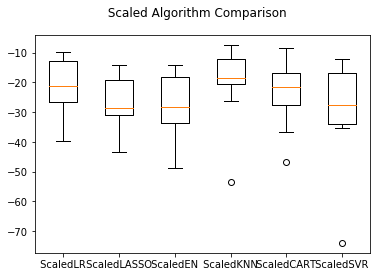

In [20]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle( ' Scaled Algorithm Comparison ' )
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Improve Results With Tuning.

In [21]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_[ 'mean_test_score' ]
stds = grid_result.cv_results_[ 'std_test_score' ]
params = grid_result.cv_results_[ 'params' ]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -18.133171 using {'n_neighbors': 3}
-20.373936 (15.036687) with: {'n_neighbors': 1}
-18.133171 (12.958886) with: {'n_neighbors': 3}
-20.139550 (12.199280) with: {'n_neighbors': 5}
-20.560152 (12.348131) with: {'n_neighbors': 7}
-20.382691 (11.617326) with: {'n_neighbors': 9}
-21.052064 (11.621184) with: {'n_neighbors': 11}
-21.157689 (11.938415) with: {'n_neighbors': 13}
-21.538655 (11.532863) with: {'n_neighbors': 15}
-22.796125 (11.605158) with: {'n_neighbors': 17}
-23.885472 (11.362449) with: {'n_neighbors': 19}
-24.364986 (11.920959) with: {'n_neighbors': 21}


# Ensemble Methods.

In [22]:
# ensembles
ensembles = []
ensembles.append(( ' ScaledAB ' , Pipeline([( ' Scaler ' , StandardScaler()),( ' AB ' ,
AdaBoostRegressor())])))
ensembles.append(( ' ScaledGBM ' , Pipeline([( ' Scaler ' , StandardScaler()),( ' GBM ' ,
GradientBoostingRegressor())])))
ensembles.append(( ' ScaledRF ' , Pipeline([( ' Scaler ' , StandardScaler()),( ' RF ' ,
RandomForestRegressor())])))
ensembles.append(( ' ScaledET ' , Pipeline([( ' Scaler ' , StandardScaler()),( ' ET ' ,
ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

 ScaledAB : -14.763492 (6.412629)
 ScaledGBM : -9.606906 (4.163959)
 ScaledRF : -12.431817 (6.995555)
 ScaledET : -11.050070 (6.265313)


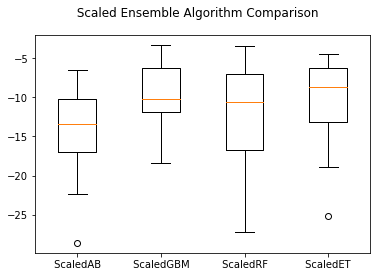

In [23]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle( ' Scaled Ensemble Algorithm Comparison ' )
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Tune Ensemble Methods.

In [24]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_[ 'mean_test_score' ]
stds = grid_result.cv_results_[ 'std_test_score' ]
params = grid_result.cv_results_[ 'params' ]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -9.061160 using {'n_estimators': 250}
-10.437617 (4.424556) with: {'n_estimators': 50}
-9.574391 (4.145705) with: {'n_estimators': 100}
-9.251591 (3.992446) with: {'n_estimators': 150}
-9.184214 (4.056788) with: {'n_estimators': 200}
-9.061160 (4.003336) with: {'n_estimators': 250}
-9.064721 (4.029519) with: {'n_estimators': 300}
-9.076152 (4.034430) with: {'n_estimators': 350}
-9.132329 (4.085341) with: {'n_estimators': 400}


# Finalize Model.

In [25]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=250)
model.fit(rescaledX, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=250,
             presort='auto', random_state=7, subsample=1.0, verbose=0,
             warm_start=False)

In [26]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
predictions
print(mean_squared_error(Y_validation, predictions))

11.9601112194
